In [1]:
CONFIG_PATH = "configs/subreddit_minority_no_peer_new.yml"

In [2]:

from utils import get_config
from superdebug import debug
from collections import Counter
from urllib.parse import urlparse
from process_data import get_model_input
config = get_config(CONFIG_PATH, print_config = False) # default config
target, original_feature_map, categorical_features, string_features, train_data, test_data, test_data_info, train_submission_upvote_df, num_all_users = get_model_input(config)

为了使用邮件提醒功能，请设置环境变量MY_QQ_EMAIL（QQ邮箱地址）与MY_QQ_EMAIL_PWD（QQ邮箱授权码）
------------------ 2022-08-31 21:30:26 ------------------


Version 7.5.0 of praw is outdated. Version 7.6.0 was released Tuesday May 10, 2022.


GPU ready...
------------------ 2022-08-31 21:30:29 ------------------
DEBUG: at /home/TableSense/largedisk/wanrong/Curation-Modeling/process_data.py:363 get_model_input
Loading prepared data...
------------------ 2022-08-31 21:30:29 ------------------


In [10]:
subreddit_datapoint_counter = Counter(train_data["SUBREDDIT"]) + Counter(test_data["SUBREDDIT"])
subreddit_datapoint_counter = [(k, subreddit_datapoint_counter[k]) for k in config["selected_subreddits"]]
subreddit_datapoint_counter

[('r/politics', 1082006),
 ('r/Conservative', 63132),
 ('r/Liberal', 2076),
 ('r/Republican', 7245),
 ('r/democrats', 6890),
 ('r/VoteBlue', 7732),
 ('r/Jokes', 138451),
 ('r/science', 111857),
 ('r/ScienceFacts', 137),
 ('r/technology', 102203),
 ('r/shittyaskscience', 7992),
 ('r/Feminism', 5482),
 ('r/MensRights', 24682),
 ('r/lesbian', 0),
 ('r/LesbianActually', 2483),
 ('r/gay', 4257),
 ('r/trans', 2597),
 ('r/teenagers', 144444),
 ('r/Showerthoughts', 252455)]

In [4]:
url_counter = Counter([urlparse(_).netloc for _ in train_data["SUBMISSION_URL"].to_list()])

In [5]:
# clickbait news
print(url_counter["www.buzzfeednews.com"], url_counter["www.huffpost.com"], url_counter["www.breitbart.com"])
# long-form relatively neutral news
print(url_counter["www.nytimes.com"], url_counter["www.theatlantic.com"], url_counter["www.theguardian.com"])

4912 13062 9781
21258 5294 18324


In [6]:
from collections import Counter, defaultdict, OrderedDict
debug(train_upvote = sum(train_data["VOTE"] == 1),
    train_downvote = sum(train_data["VOTE"] == 0),
    test_upvote = sum(test_data["VOTE"] == 1),
    test_downvote = sum(test_data["VOTE"] == 0),
    )
user_votes = Counter()
submission_votes = Counter()
subreddit_subreddit_votes = defaultdict(Counter)
for row_i, row in train_data.iterrows():
    submission_votes[row["SUBMISSION_ID"]] += 1
    user_votes[row["USERNAME"]] += 1
    subreddit_subreddit_votes[row["SUBREDDIT"]][row["VOTE"]] += 1
    if "users" not in subreddit_subreddit_votes[row["SUBREDDIT"]]:
        subreddit_subreddit_votes[row["SUBREDDIT"]]["users"] = set()
    subreddit_subreddit_votes[row["SUBREDDIT"]]["users"].add(row["USERNAME"])


------------------ 2022-08-31 21:30:48 ------------------
DEBUG: 4 vars: ['train_upvote', 'train_downvote', 'test_upvote', 'test_downvote'], at <ipython-input-6-bf241b5dc052>:5 <module>
0 / 1.  train_upvote num val: 1151115
1 / 2.  train_downvote num val: 421782
2 / 3.  test_upvote num val: 288360
3 / 4.  test_downvote num val: 104864
------------------ 2022-08-31 21:30:48 ------------------


------------------ 2022-08-31 21:34:24 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-7-07c3b14be516>:12 draw_histogram
0 / 5.  distribution str len 8490: OrderedDict([(1, 2461), (2, 1620), (3, 1260), (4, 1063), (5, 927), (6, 828), (7, 707), (8, 691), (9, 671), (10, 573), (11, 558), (12, 511), (13, 530), (14, 427), (15, 425), (16, 420), (17, 390), (18, 395), (19, 405), (20, 369), (21, 318), (22, 329), (23, 303), (24, 328), (25, 275), (26, 255), (27, 256), (28, 275), (29, 238), (30, 244), (31, 194), (32, 216), (33, 213), (34, 197), (35, 185), (36, 183), (37, 180), (38, 181), (39, 155), (40, 169), (41, 158), (42, 153), (43, 140), (44, 162), (45, 130), (46, 137), (47, 1 ... 627, 1), (5302, 1)])
------------------ 2022-08-31 21:34:24 ------------------
------------------ 2022-08-31 21:34:24 ------------------
DEBUG: at <ipython-input-7-07c3b14be516>:14 draw_histogram
10% of x take up 84.8107% of distribution
------------------ 2022-08-31 21:34:24 ------------------


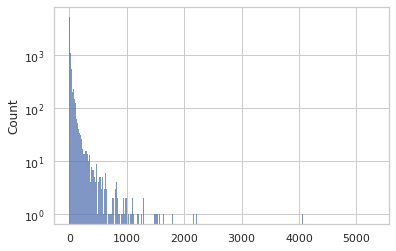

------------------ 2022-08-31 21:34:28 ------------------
DEBUG: at <ipython-input-7-07c3b14be516>:19 draw_histogram
Figure saved in output/user_votes_distribution.png
------------------ 2022-08-31 21:34:28 ------------------
------------------ 2022-08-31 21:34:45 ------------------
DEBUG: 1 vars: ['distribution'], at <ipython-input-7-07c3b14be516>:12 draw_histogram
0 / 6.  distribution str len 2926: OrderedDict([(1, 310819), (2, 59804), (3, 26512), (4, 15165), (5, 9837), (6, 6930), (7, 5146), (8, 3970), (9, 3127), (10, 2507), (11, 2207), (12, 1847), (13, 1623), (14, 1316), (15, 1242), (16, 1097), (17, 959), (18, 827), (19, 789), (20, 699), (21, 660), (22, 575), (23, 542), (24, 506), (25, 458), (26, 419), (27, 398), (28, 391), (29, 352), (30, 329), (31, 274), (32, 252), (33, 263), (34, 271), (35, 210), (36, 203), (37, 232), (38, 209), (39, 188), (40, 169), (41, 155), (42, 132), (43, 161), (44, 137), (45, 151),  ... (379, 1), (525, 1)])
------------------ 2022-08-31 21:34:45 -----------

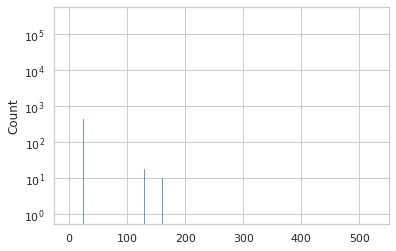

------------------ 2022-08-31 21:35:15 ------------------
DEBUG: at <ipython-input-7-07c3b14be516>:19 draw_histogram
Figure saved in output/submission_votes_distribution.png
------------------ 2022-08-31 21:35:15 ------------------


In [7]:
from importlib_metadata import distribution
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
def draw_histogram(nums:list, file_name):
    sns.set_theme(style="whitegrid")
    ax = sns.histplot(data=nums)
    ax.set_yscale('log')
    # ax.set_xscale('log')
    distribution = OrderedDict(sorted(list(Counter(nums).items())))
    debug(distribution=str(distribution))
    # ax.text(-0.15, 1.1, distribution, fontsize=7, transform=ax.transAxes)
    debug(f"10% of x take up {sum(OrderedDict(list(distribution.items())[:len(distribution)//10]).values()) / sum(distribution.values()) * 100:.4f}% of distribution")
    save_path = f"output/{file_name}.png"
    plt.show()
    plt.savefig(save_path, dpi = 300)
    plt.close()
    debug(f"Figure saved in {save_path}")

draw_histogram(list(user_votes.values()), "user_votes_distribution")
draw_histogram(list(submission_votes.values()), "submission_votes_distribution")

In [8]:
for subreddit in subreddit_subreddit_votes:
    subreddit_subreddit_votes[subreddit]["downvote_rate"] = 100 * subreddit_subreddit_votes[subreddit][0] / (subreddit_subreddit_votes[subreddit][1] + subreddit_subreddit_votes[subreddit][0])
    subreddit_subreddit_votes[subreddit]["subreddit"] = original_feature_map["SUBREDDIT"][subreddit]
    subreddit_subreddit_votes[subreddit]["users"] = str(subreddit_subreddit_votes[subreddit]["users"])
subreddit_subreddit_votes = pd.DataFrame(list(subreddit_subreddit_votes.values())).set_index("subreddit")
debug(subreddit_votes=subreddit_subreddit_votes)
save_path = "output/subreddit_votes_users.csv"
subreddit_subreddit_votes.to_csv(save_path)
debug(f"Votes of each subreddit is saved to {save_path}")

KeyError: 'r/Showerthoughts'